In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned Iris dataset
df = pd.read_csv("../data/raw/iris.csv")

# Quick peek
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Iris Dataset Overview

The Iris dataset contains 150 samples of iris flowers from three species: *setosa*, *versicolor*, and *virginica*.  
Each sample includes four numerical features:

- Sepal length
- Sepal width
- Petal length
- Petal width

The goal is to classify the species based on these features.


In [4]:
# Basic info and summary statistics
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Summary Statistics Insights

- All features are numeric and have no missing values — ideal for modeling.
- Petal measurements (length and width) show higher variability and wider ranges than sepal measurements.
- Sepal length and width are less likely to separate classes cleanly due to their narrower ranges.
- The minimum values suggest no zero or negative measurements, which simplifies preprocessing (e.g. no log transforms needed).

In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

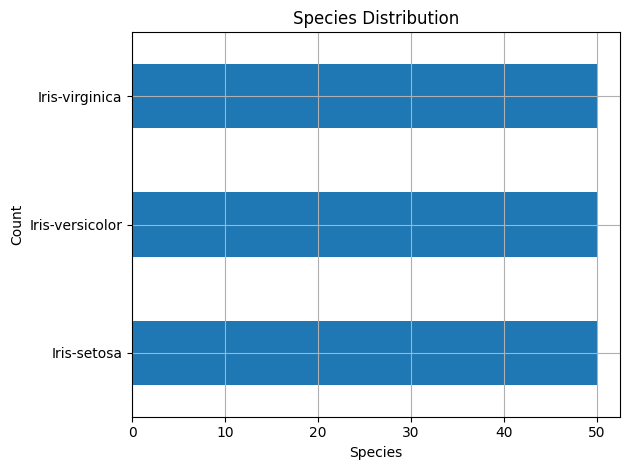

In [6]:
df["species"].value_counts().plot(kind="barh", title="Species Distribution")
plt.xlabel("Species")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

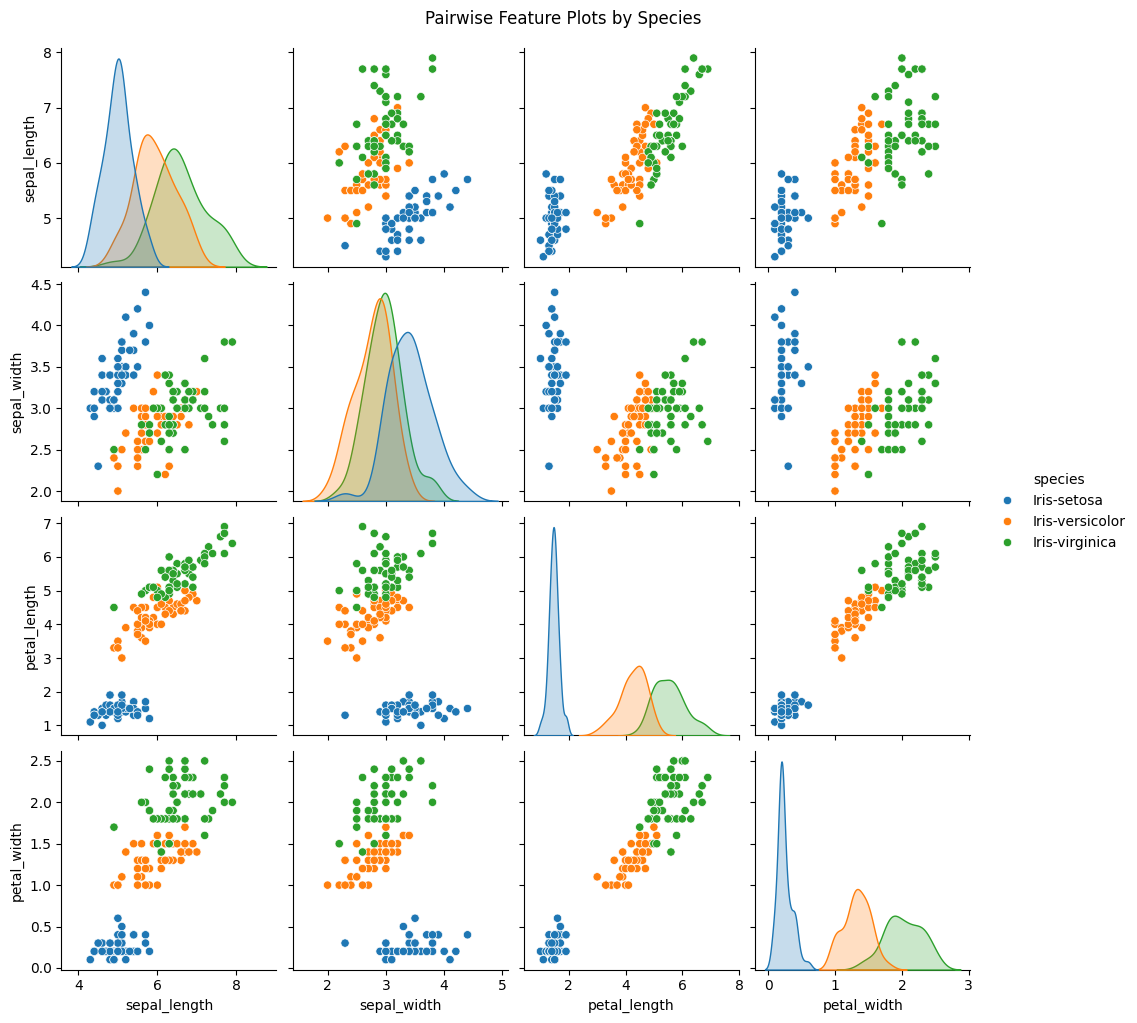

In [7]:
sns.pairplot(df, hue="species")
plt.suptitle("Pairwise Feature Plots by Species", y=1.02)
plt.show()

Pairplot Interpretation

- The plot shows a clean and tight cluster for *Iris-setosa*, confirming it is linearly separable.
- *Iris-versicolor* and *Iris-virginica* exhibit significant overlap, though virginica tends to have larger petals.
- This reinforces that **petal length and petal width** are the most discriminative features in the dataset.


In [10]:
# Check and drop duplicates
num_dups = df.duplicated().sum()
print(f"Duplicate rows found: {num_dups}")

df_clean = df.drop_duplicates().reset_index(drop=True)
df_clean.to_csv("../data/processed/iris_clean.csv", index=False)
df[df.duplicated()]
df[df.duplicated()].value_counts()



Duplicate rows found: 3


sepal_length  sepal_width  petal_length  petal_width  species       
4.9           3.1          1.5           0.1          Iris-setosa       2
5.8           2.7          5.1           1.9          Iris-virginica    1
Name: count, dtype: int64

Duplicate Analysis

- Found 2 unique rows that were duplicated.
- One of them (Iris-setosa) appeared 3 times → 2 duplicates.
- The other (Iris-virginica) appeared twice → 1 duplicate.
- We removed all exact duplicates using `drop_duplicates()`, resulting in a cleaned dataset with 147 unique records.
